## Imports

In [11]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score



## Data Generation

In [ ]:
# create dataset
X, y = make_classification(n_features=5, n_samples=100)

# create dataframe
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5'])
df['Target'] = y

# fit logistic regression model
lr = LogisticRegression()
lr.fit(X, y)

# make prediction
df['predicted'] = lr.predict(X)

In [13]:
df['predicted_proba']=lr.predict_proba(X)[:,1]

In [69]:
df.head(3)

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Target,predicted,predicted_proba
0,0.566228,-0.794757,-0.015308,-0.626870,-0.762304,0,0,0.296737
1,2.144726,-1.559694,0.411502,-1.599936,-0.388142,1,1,0.644449
2,-0.665368,0.654357,-0.731412,0.587376,0.414140,0,1,0.633313


## Main Body

**Lets make funcions from scratch to calculate metrics**

In [70]:
def accuracy_from_scratch(predictions,target):
    return (target==predictions).mean()

def precision_from_scratch(predictions,target):
    
    '''
    Precision = tp/(tp+fp)
    '''
    
    tp = ((target==1) & (predictions==1)).sum()
    tn = ((target==0) & (predictions==0)).sum()
    fp = ((target==1) & (predictions==0)).sum() #mistake of 1st gender
    fn = ((target==0) & (predictions==1)).sum() #mistake of 2nd gender
    return (tp/(tp+fp))


def recall_from_scratch(predictions,target):
    
    '''
    Recall= tp/(tp+fn)
    '''
    
    tp = ((target==1) & (predictions==1)).sum()from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    tn = ((target==0) & (predictions==0)).sum()
    fp = ((target==1) & (predictions==0)).sum() #mistake of 1st gender
    fn = ((target==0) & (predictions==1)).sum() #mistake of 2nd gender
    return (tp/(tp+fn))


def f1_score_from_scracth(predictions,target):
    
    
    '''
    F1= 2*pr*rc/(pr+rc)
    '''
    
    tp = ((target==1) & (predictions==1)).sum()
    tn = ((target==0) & (predictions==0)).sum()
    fp = ((target==1) & (predictions==0)).sum() #mistake of 1st gender
    fn = ((target==0) & (predictions==1)).sum() #mistake of 2nd gender
    
    return (2*(tp/(tp+fp))*(tp/(tp+fn)))/(tp/(tp+fp)+(tp/(tp+fn)))


def true_positive_rate_fr_sc(predictions,target):

        
    '''
    TPR= tp/(tp+fn) the same as recall
    '''
    
    tp = ((target==1) & (predictions==1)).sum()
    tn = ((target==0) & (predictions==0)).sum()
    fp = ((target==1) & (predictions==0)).sum() #mistake of 1st gender
    fn = ((target==0) & (predictions==1)).sum() #mistake of 2nd gender
    
    
    return (tp/(tp+fn))



def false_positive_rate_fr_sc(predictions,target):

        
    '''
    FPR= fp/(fp+tn)
    '''
    
    tp = ((target==1) & (predictions==1)).sum()
    tn = ((target==0) & (predictions==0)).sum()
    fp = ((target==1) & (predictions==0)).sum() #mistake of 1st gender
    fn = ((target==0) & (predictions==1)).sum() #mistake of 2nd gender
    
    
    return (fp/(fp+tn))

In [71]:
print('accuracy',accuracy_from_scratch(df['predicted'],df['Target']))
print('precision',precision_from_scratch(df['predicted'],df['Target']))
print('recall',recall_from_scratch(df['predicted'],df['Target']))
print('f1_score',f1_score_from_scracth(df['predicted'],df['Target']))
print('TPR',true_positive_rate_fr_sc(df['predicted'],df['Target']))
print('FPR',false_positive_rate_fr_sc(df['predicted'],df['Target']))

accuracy 0.86
precision 0.84
recall 0.875
f1_score 0.8571428571428572
TPR 0.875
FPR 0.15384615384615385


Lets compare them with metrics from sklearn

In [17]:

print(accuracy_score(df['predicted'],df['Target']))
print(precision_score(df['predicted'],df['Target']))
print(recall_score(df['predicted'],df['Target']))
print(f1_score(df['predicted'],df['Target']))

0.86
0.84
0.875
0.8571428571428572


LEts plot confusion matrix

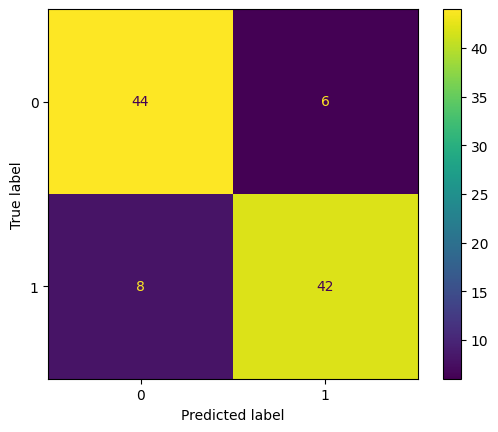

In [22]:
predictions=df['predicted']
y_test=df['Target']
cm = confusion_matrix(y_test, predictions, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=lr.classes_)
disp.plot()

Lets manually generate FPR,TPR

In [76]:
threshold=0.01

tpr=[]
fpr=[]
threshold_list=[]
for i in range(0,100):
    
    threshold =i/100
    new_predicions=(df['predicted_proba']>threshold).astype(int)


    predictions=new_predicions
    target= df['Target']

    tp = ((target==1) & (predictions==1)).sum()
    tn = ((target==0) & (predictions==0)).sum()
    fp = ((target==1) & (predictions==0)).sum() #mistake of 1st gender
    fn = ((target==0) & (predictions==1)).sum() #mistake of 2nd gender
    threshold_list.append(threshold)
    tpr.append((tp/(tp+fn)))
    fpr.append((fp/(fp+tn)))


fpr=[0 if np.isnan(x) else x for x in fpr]
tpr = [0 if np.isnan(x) else x for x in tpr]


print('FPR',fpr)
print()
print('TPR',tpr)

FPR [0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.07692307692307693, 0.14285714285714285, 0.14285714285714285, 0.125, 0.11764705882352941, 0.16666666666666666, 0.16666666666666666, 0.2, 0.2, 0.17391304347826086, 0.16, 0.15384615384615385, 0.14814814814814814, 0.13333333333333333, 0.125, 0.125, 0.11428571428571428, 0.1111111111111111, 0.10810810810810811, 0.10526315789473684, 0.10526315789473684, 0.1, 0.11627906976744186, 0.11627906976744186, 0.11363636363636363, 0.11363636363636363, 0.13043478260869565, 0.13043478260869565, 0.12244897959183673, 0.14, 0.14, 0.14, 0.14, 0.13725490196078433, 0.13725490196078433, 0.13725490196078433, 0.13725490196078433, 0.13725490196078433, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.15384615384615385, 0.16981132075471697, 0.16981132075471697, 0.16666666666666666, 0.18181818181818182, 0.18181818181818182, 0.21052631578947367, 0.25, 0.25, 0.25, 0.245901

/tmp/ipykernel_22189/3575485047.py:21: RuntimeWarning: invalid value encountered in scalar divide
  fpr.append((fp/(fp+tn)))


Lets plot roc-auc line

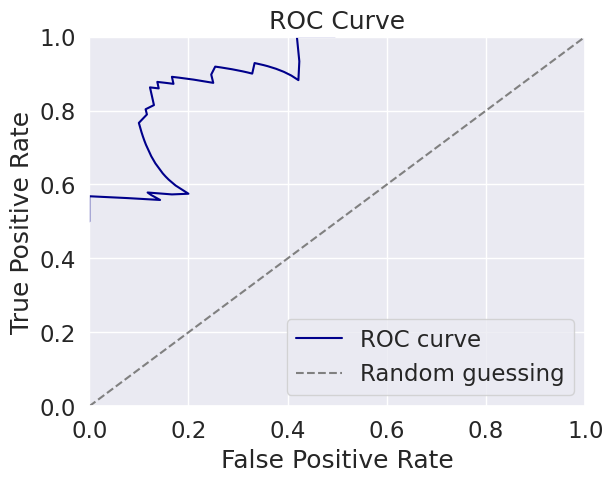

In [77]:


# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve', color='darkblue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guessing')
plt.xlim([0,1])
plt.ylim([0,1])
plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

It looks bizzare.Lets compare from one from the library

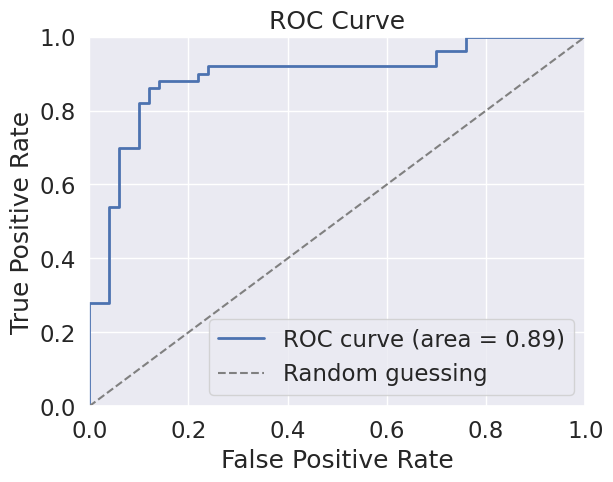

In [78]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(df['Target'], df['predicted_proba'])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guessing')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
# Calculate AUC score

auc = roc_auc_score(df['Target'], df['predicted_proba'])
print('AUC: {:.2f}'.format(auc))

AUC: 0.89


## Conclusion 


1.In this notebook, we manually coded commonly used metrics in binary classification, in order to be ready for relevant quesions at interview for position.

2.We plotted roc auc curve, and it looks like shit. Probably one from sklearn uses some different algorithm for searching thresholds. However I have to focus on other thins to get ready for interview.